In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import yaml
from scipy import stats
from matplotlib.ticker import FormatStrFormatter

In [2]:
data_id = "32"

with open(f'my_data{data_id}.yaml') as f:
    data = yaml.safe_load(f)

In [3]:
concurrencies = [1,2,4,8,16,32,64]
#samples = [100000]
samples = [1,10,100,1000,10000]
#samples = [1,10,100,1000]
avoid_samples = []

In [4]:
print(len(data))
print(data.keys())

169
dict_keys(['c1_s1', 'c1_s1 merlin run', 'c1_s1 start verify', 'c1_s1 start run-workers', 'c1_s1 start samp1', 'c1_s10', 'c1_s10 merlin run', 'c1_s10 start verify', 'c1_s10 start run-workers', 'c1_s10 start samp1', 'c1_s100', 'c1_s100 merlin run', 'c1_s100 start verify', 'c1_s100 start run-workers', 'c1_s100 start samp1', 'c1_s1000', 'c1_s1000 merlin run', 'c1_s1000 start run-workers', 'c1_s1000 start samp1', 'c1_s10000', 'c1_s10000 merlin run', 'c1_s10000 start run-workers', 'c1_s10000 start samp1', 'c2_s1', 'c2_s1 merlin run', 'c2_s1 start verify', 'c2_s1 start run-workers', 'c2_s1 start samp1', 'c2_s10', 'c2_s10 merlin run', 'c2_s10 start verify', 'c2_s10 start run-workers', 'c2_s10 start samp1', 'c2_s100', 'c2_s100 merlin run', 'c2_s100 start verify', 'c2_s100 start run-workers', 'c2_s100 start samp1', 'c2_s1000', 'c2_s1000 merlin run', 'c2_s1000 start verify', 'c2_s1000 start run-workers', 'c2_s1000 start samp1', 'c2_s10000', 'c2_s10000 merlin run', 'c2_s10000 start run-workers

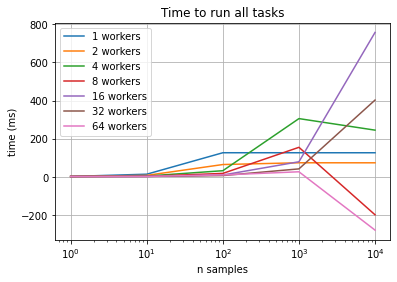

In [5]:
# TOTAL WF TIME
# OVERHEAD TYPE 2
    
#concurrencies = [1,2,4,8,16,32,64]
#samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        stop = False
        for avoid in avoid_samples:
            if (name.endswith(f"_s{str(avoid)}")) or (f"_s{str(avoid)} " in name):
                stop = True
                break
        if stop:
            continue
        if f"c{con}_" in name and "start verify" in name:
            if "ERROR" in str(val):
                print("ERROR:" + name + " is " + str(val))
                break
            start_verify = val
        if f"c{con}_" in name and "start run-workers" in name:
            start_run_workers = val
            all_task_times.append((start_verify - start_run_workers))
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue
        
plt.xscale("log")
#plt.yscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (ms)',
               title='Time to run all tasks')
ax.grid()

fig.savefig(f"figs/all_task_time__{data_id}.png")
plt.show()

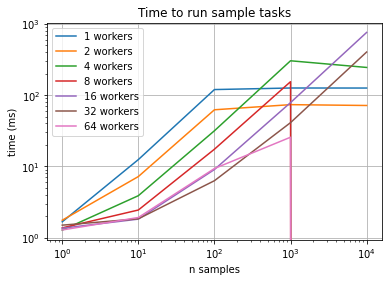

In [6]:
# SAMPLE TIME
    
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        stop = False
        for avoid in avoid_samples:
            if (name.endswith(f"_s{str(avoid)}")) or (f"_s{str(avoid)} " in name):
                stop = True
                break
        if stop:
            continue
        if f"c{con}_" in name and "start verify" in name:
            if "ERROR" in str(val):
                print("ERROR:" + name + " is " + str(val))
                break
            start_verify = val
        if f"c{con}_" in name and "start samp1" in name:
            if "ERROR" in str(val):
                print("ERROR" + name + " is " + str(val))
                break
            start_samp1 = val
            all_task_times.append((start_verify - start_samp1))
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue
        
plt.xscale("log")
plt.yscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (ms)',
               title='Time to run sample tasks')
ax.grid()

fig.savefig(f"figs/sample_task_time__{data_id}.png")
plt.show()

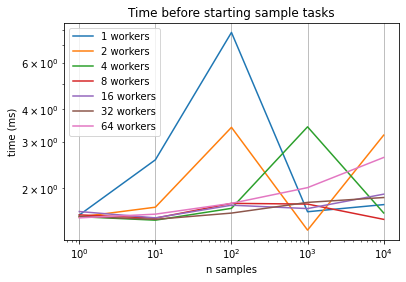

In [7]:
# TIME TO START WORKING ON TASKS
# OVERHEAD TYPE 4
    
#concurrencies = [1,2,4,8,16,32,64]
#samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        stop = False
        for avoid in avoid_samples:
            if (name.endswith(f"_s{str(avoid)}")) or (f"_s{str(avoid)} " in name):
                stop = True
                break
        if stop:
            continue
        if f"c{con}_" in name and "start run-workers" in name:
            start_run_workers = val
        if f"c{con}_" in name and "start samp1" in name:
            if "ERROR" in str(val):
                print("ERROR" + name + " is " + str(val))
                break
            start_samp1 = val
            all_task_times.append((start_samp1 - start_run_workers))
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}: {e}")
        continue
        
plt.xscale("log")
plt.yscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (ms)',
               title='Time before starting sample tasks')
ax.grid()

fig.savefig(f"figs/pre_sample_time__{data_id}.png")
plt.show()

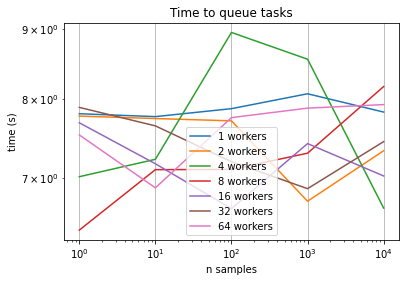

In [8]:
# TIME TO QUEUE ALL TASKS
# OVERHEAD TYPE 3
    
#concurrencies = [1,2,4,8,16,32,64]
#samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        stop = False
        for avoid in avoid_samples:
            if (name.endswith(f"_s{str(avoid)}")) or (f"_s{str(avoid)} " in name):
                stop = True
                break
        if stop:
            continue
        if f"c{con}_" in name and "merlin run" in name:
            queue_tasks = val
            all_task_times.append(queue_tasks)
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue

plt.xscale("log")
plt.yscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (s)',
               title='Time to queue tasks')
ax.grid()

fig.savefig(f"figs/task_queue_time__{data_id}.png")
plt.show()

2.082459754048614
13.737981916987337
125.42272862102254
599.973848994734
1149.4734384088952
2.1895229549554642
14.30161821100046
127.31257781389286
1203.3938151148905
2401.1062561307626
1.7379802860086784
13.159614606032846
124.72128004999831
1204.8449523628806
4803.099695582496
1.7970809589896817
12.311881255038315
133.4027409000555
1212.2014342023467
9468.642778226262
1.880351991043426
12.482590821979102
132.36956448009005
1225.0117713929794
11761.33515706347
1.997197885037167
12.363926670048386
132.62376250189845
1248.7514576802496
18508.18781956684
1.724378667975543
12.687800689018331
136.56364842309267
1375.654433051881
11467.34512745266


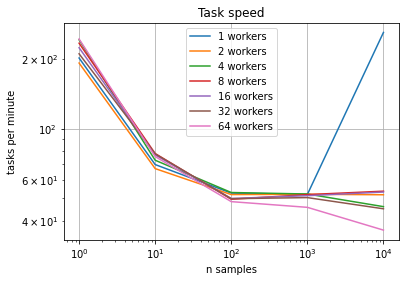

In [9]:
# TASK SPEED
# OVERHEAD TYPE 1
    
#concurrencies = [1,2,4,8,16,32,64]
#samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    t_per_m = []
    for name, times in data.items():
        stop = False
        for avoid in avoid_samples:
            if (name.endswith(f"_s{str(avoid)}")) or (f"_s{str(avoid)} " in name):
                stop = True
                break
        if stop:
            continue
        if f"c{con}_" in name and " " not in name:
            n_tasks = len(times)
            seconds = sum(times)
            print(seconds)
            mins = seconds / 60.0
            if mins == 0:
                t_per_m.append(0)
                continue
            tasks_per_min = n_tasks / mins
            t_per_m.append(tasks_per_min)
    ax.plot(samples, t_per_m, label=f"{con} workers")

plt.xscale("log")
plt.yscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='tasks per minute',
               title='Task speed')
ax.grid()

fig.savefig(f"figs/task_speed__{data_id}.png")
plt.show()

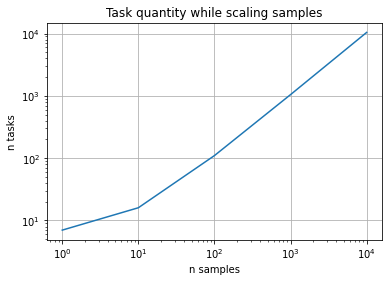

In [10]:
concurrency = 16

n_tasks = []
for sam in samples:
    for name, times in data.items():
        if name.endswith(f"_s{sam}") and name.startswith(f"c16_"):
            n_tasks.append(len(times))
            
fig, ax = plt.subplots()
ax.plot(samples, n_tasks)
plt.xscale("log")
plt.yscale("log")
ax.set(xlabel='n samples', ylabel='n tasks',
       title='Task quantity while scaling samples')
ax.grid()

#fig.savefig(f"figs/n_tasks3__{data_id}.png")
plt.show()

WITH OUTLIERS
58188 task times
22.55429670601734: max task time
1.1797259344656899: mean task time
1.4056651885865126: standard deviation

WITHOUT OUTLIERS
9912 task times
48276 task times
1.247063110000454: max task time
1.0970052438760438: mean task time
0.0443122537485727: standard deviation


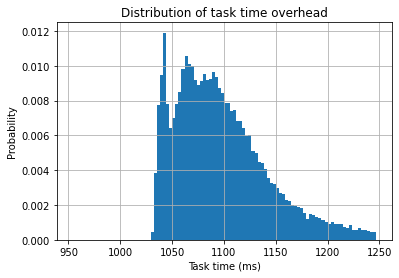

In [11]:
# OVERHEAD TYPE 1
# combining data from all concurrencies and sample quantities

def is_outlier(points, thresh=3):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

x = []
fig, ax = plt.subplots()

for name, times in data.items():
    if " " not in name:
        x += times

x = np.array(x)
#mad = stats.median_absolute_deviation(x)
outlier_mask = is_outlier(x)

print("WITH OUTLIERS")
print(f"{len(x)} task times")
print(f"{max(x)}: max task time")
print(f"{np.mean(x)}: mean task time")
print(f"{np.std(x)}: standard deviation")
outliers = x[outlier_mask]
non_outliers = x[~outlier_mask]
print("\nWITHOUT OUTLIERS")
print(f"{len(outliers)} task times")
print(f"{len(non_outliers)} task times")
print(f"{max(non_outliers)}: max task time")
print(f"{np.mean(non_outliers)}: mean task time")
print(f"{np.std(non_outliers)}: standard deviation")

n_bins = 100

ax.grid()
plt.hist(non_outliers*1000, bins=n_bins, density=True)
plt.xlabel('Task time (ms)')
plt.ylabel('Probability')
ax.set(title='Distribution of task time overhead')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.savefig(f"figs/histogram__{data_id}.png")

plt.show()